In [1]:
import glob
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# from pretrained_models.inceptionv3net import InceptionV3Net
# from pretrained_models.vgg16net import VGG16Net
# from pretrained_models.xceptionnet import XceptionNet
# from pretrained_models.resnet50net import ResNet50Net
from pypackage.classifier import Classifier
# from pypackage.preprocessor import Preprocessor
# from pypackage.feature_extractor import FeatureExtractor
import tensorflow as tf

2023-02-04 20:18:32.190638: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Load Fused Feature

In [2]:
train_ft = np.load("Extracted/fusedtrain.npy")

In [3]:
test_ft = np.load("Extracted/fusedtest.npy")

### Load Labels

In [4]:
y_train = np.load("Extracted/train_labels.npy")

In [5]:
test_labels = np.load("Extracted/test_labels.npy")

### Random Forest classifier

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)

LabelEncoder()

In [10]:
# Prediction from Random Forest classifier
# pred_RF = Classifier.RF(train_ft, test_ft, y_train)

# Inverse le transform to get original label back.
pred_RF = le.inverse_transform(pred_RF)
np.save("pred_RF", pred_RF)

# Print accuracy, precision, fscore
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, classification_report

RF_Accuracy = accuracy_score(test_labels, pred_RF)
RF_Precision = precision_score(test_labels, pred_RF, average='weighted')
RF_Fscore = f1_score(test_labels, pred_RF, average='weighted')

print("RF_Accuracy = ", RF_Accuracy, "RF_Precision = ", RF_Precision, "RF_Fscore = ", RF_Fscore)

RF_Accuracy =  0.938977879481312 RF_Precision =  0.9411623334133072 RF_Fscore =  0.9380426704826692


In [11]:
print(classification_report(test_labels, pred_RF))

              precision    recall  f1-score   support

      glioma       0.96      0.81      0.88      1200
  meningioma       0.86      0.94      0.90      1224
    no_tumor       0.99      1.00      0.99      1620
   pituitary       0.94      0.98      0.96      1200

    accuracy                           0.94      5244
   macro avg       0.94      0.93      0.93      5244
weighted avg       0.94      0.94      0.94      5244



[[ 970  173    3   54]
 [  37 1153   13   21]
 [   0    0 1620    0]
 [   3   10    6 1181]]


<AxesSubplot:>

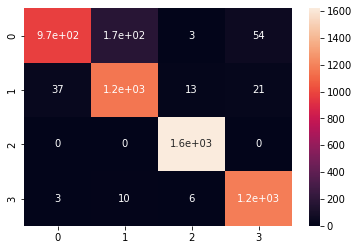

In [12]:
# Confusion Matrix - verify accuracy of each class
cm = confusion_matrix(test_labels, pred_RF)
print(cm)
sns.heatmap(cm, annot=True)